In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from pandas.io import sql
from sqlalchemy import create_engine


In [11]:
data = pd.read_csv("EMS_Incident_Dispatch_Data.csv") 

/Users/kylemcnicoll/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#Data is 2gb and over 8.5 millions rows. going to randomly select 50K rows of the data to play with.
#data.info()

df = data.sample(n=50000)
df.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,...,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
3573494,152272229,08/15/2015 01:40:47 PM,DRUG,4,DRUG,4,08/15/2015 01:40:59 PM,Y,12,08/15/2015 01:41:10 PM,...,10453.0,46.0,14.0,205.0,10.0,15.0,N,N,N,N
6924421,173411072,12/07/2017 09:17:21 AM,JUMPDN,2,JUMPDN,2,12/07/2017 09:17:36 AM,Y,15,12/07/2017 09:18:03 AM,...,10451.0,40.0,8.0,201.0,7.0,15.0,N,N,N,N
5049306,162371613,08/24/2016 11:13:31 AM,INJMAJ,3,INJMAJ,3,08/24/2016 11:13:44 AM,Y,13,08/24/2016 11:14:21 AM,...,11102.0,114.0,22.0,401.0,30.0,12.0,N,N,N,N
843985,132323617,08/20/2013 09:37:38 PM,INJURY,5,INJURY,5,08/20/2013 09:38:04 PM,Y,26,08/20/2013 09:38:24 PM,...,11220.0,68.0,43.0,310.0,20.0,11.0,N,N,N,N
7824339,181923721,07/11/2018 06:32:49 PM,INJMIN,7,INJMIN,7,07/11/2018 06:33:01 PM,Y,12,07/11/2018 06:33:10 PM,...,10306.0,122.0,50.0,503.0,31.0,11.0,N,N,N,N


In [43]:
#Null values for columns that will be used less then 2%. going to drop NA for zip.
# df = df.dropna(subset=['ZIPCODE'])

In [46]:
df.isnull().sum()

CAD_INCIDENT_ID                       0
INCIDENT_DATETIME                     0
INITIAL_CALL_TYPE                     0
INITIAL_SEVERITY_LEVEL_CODE           0
FINAL_CALL_TYPE                       0
FINAL_SEVERITY_LEVEL_CODE             0
FIRST_ASSIGNMENT_DATETIME           346
VALID_DISPATCH_RSPNS_TIME_INDC        0
DISPATCH_RESPONSE_SECONDS_QY          0
FIRST_ACTIVATION_DATETIME           446
FIRST_ON_SCENE_DATETIME            1577
VALID_INCIDENT_RSPNS_TIME_INDC        0
INCIDENT_RESPONSE_SECONDS_QY       1582
INCIDENT_TRAVEL_TM_SECONDS_QY      1578
FIRST_TO_HOSP_DATETIME            14166
FIRST_HOSP_ARRIVAL_DATETIME       14398
INCIDENT_CLOSE_DATETIME              16
HELD_INDICATOR                        0
INCIDENT_DISPOSITION_CODE           422
BOROUGH                               0
INCIDENT_DISPATCH_AREA                0
ZIPCODE                               0
POLICEPRECINCT                        0
CITYCOUNCILDISTRICT                  19
COMMUNITYDISTRICT                     0


In [47]:
#Plotting time series seeing if I need to seperate date from time in current data frame.
import warnings
warnings.filterwarnings('ignore')

# Load required libraries
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [53]:
df.head()


,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,...,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
2864516,150513312,02/20/2015 08:52:44 PM,INJURY,5,INJURY,5,02/20/2015 08:53:18 PM,Y,34,02/20/2015 08:53:31 PM,...,11418.0,102.0,29.0,409.0,27.0,5.0,N,N,N,N
3813485,152864357,10/13/2015 10:30:26 PM,INJURY,5,INJURY,5,10/13/2015 10:30:43 PM,Y,17,10/13/2015 10:30:51 PM,...,11368.0,115.0,21.0,403.0,24.0,14.0,N,N,N,N
8185674,182773527,10/04/2018 05:31:25 PM,DRUG,4,DRUG,4,10/04/2018 06:23:20 PM,Y,3115,10/04/2018 06:24:00 PM,...,10027.0,28.0,9.0,110.0,5.0,13.0,N,N,N,N
2846282,150463166,02/15/2015 08:19:53 PM,UNKNOW,4,UNKNOW,4,02/15/2015 08:20:10 PM,Y,17,02/15/2015 08:20:17 PM,...,11355.0,109.0,20.0,407.0,25.0,6.0,N,N,N,N
3937000,153190209,11/15/2015 01:22:10 AM,INJURY,5,INJURY,5,11/15/2015 01:22:32 AM,Y,22,11/15/2015 01:22:38 AM,...,10036.0,18.0,4.0,105.0,2.0,12.0,N,N,N,N


In [145]:
def convert24(str1): 
      
    # Checking if last two elements of time 
    # is AM and first two elements are 12 
    if str1[-2:] == "AM" and str1[:2] == "12": 
        return "00" + str1[2:-2] 
          
    # remove the AM     
    elif str1[-2:] == "AM": 
        return str1[:-2] 
      
    # Checking if last two elements of time 
    # is PM and first two elements are 12    
    elif str1[-2:] == "PM" and str1[:2] == "12": 
        return str1[:-2] 
          
    else: 
          
        # add 12 to hours and remove PM 
        return str(int(str1[:2]) + 12) + str1[2:8] 

In [13]:
#creating new column with incident date, and then a second with incidentt ime.
df['INCIDENT_DATE'] = df.apply(lambda x:(x['INCIDENT_DATETIME'].split(" "))[0],axis=1)
df['INCIDENT_TIME'] = df.apply(lambda x:(x["INCIDENT_DATETIME"][10:]), axis=1)

In [14]:
#converting to 24 hour clock and remving am pm
for row in range(len(df+1)):
    df["INCIDENT_TIME"]convert24(df['INCIDENT_TIME'].iloc[1])

SyntaxError: invalid syntax (<ipython-input-14-839a2d0d5cc2>, line 3)

In [29]:
#Converting Incident date column to datetime for time series modelling.
df['INCIDENT_DATE']= pd.to_datetime(df['INCIDENT_DATE']) 

In [347]:
#Converting Incident time column to datetime for time series modelling.
#Converting Incident date column to datetime for time series modelling.
# df['INCIDENT_TIME']= pd.to_datetime(df['INCIDENT_TIME']) 

In [154]:
df.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,...,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,INCIDENT_DATE,INCIDENT_TIME
2864516,150513312,02/20/2015 08:52:44 PM,INJURY,5,INJURY,5,02/20/2015 08:53:18 PM,Y,34,02/20/2015 08:53:31 PM,...,29.0,409.0,27.0,5.0,N,N,N,N,2015-02-20,20:52:44
3813485,152864357,10/13/2015 10:30:26 PM,INJURY,5,INJURY,5,10/13/2015 10:30:43 PM,Y,17,10/13/2015 10:30:51 PM,...,21.0,403.0,24.0,14.0,N,N,N,N,2015-10-13,22:30:26
8185674,182773527,10/04/2018 05:31:25 PM,DRUG,4,DRUG,4,10/04/2018 06:23:20 PM,Y,3115,10/04/2018 06:24:00 PM,...,9.0,110.0,5.0,13.0,N,N,N,N,2018-10-04,17:31:25
2846282,150463166,02/15/2015 08:19:53 PM,UNKNOW,4,UNKNOW,4,02/15/2015 08:20:10 PM,Y,17,02/15/2015 08:20:17 PM,...,20.0,407.0,25.0,6.0,N,N,N,N,2015-02-15,20:19:53
3937000,153190209,11/15/2015 01:22:10 AM,INJURY,5,INJURY,5,11/15/2015 01:22:32 AM,Y,22,11/15/2015 01:22:38 AM,...,4.0,105.0,2.0,12.0,N,N,N,N,2015-11-15,01:22:10


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49041 entries, 2864516 to 2646649
Data columns (total 33 columns):
CAD_INCIDENT_ID                   49041 non-null int64
INCIDENT_DATETIME                 49041 non-null object
INITIAL_CALL_TYPE                 49041 non-null object
INITIAL_SEVERITY_LEVEL_CODE       49041 non-null int64
FINAL_CALL_TYPE                   49041 non-null object
FINAL_SEVERITY_LEVEL_CODE         49041 non-null int64
FIRST_ASSIGNMENT_DATETIME         48695 non-null object
VALID_DISPATCH_RSPNS_TIME_INDC    49041 non-null object
DISPATCH_RESPONSE_SECONDS_QY      49041 non-null int64
FIRST_ACTIVATION_DATETIME         48595 non-null object
FIRST_ON_SCENE_DATETIME           47464 non-null object
VALID_INCIDENT_RSPNS_TIME_INDC    49041 non-null object
INCIDENT_RESPONSE_SECONDS_QY      47459 non-null float64
INCIDENT_TRAVEL_TM_SECONDS_QY     47463 non-null float64
FIRST_TO_HOSP_DATETIME            34875 non-null object
FIRST_HOSP_ARRIVAL_DATETIME       34643 non-n

# RABBIT HOLE OF API DIDNT END UP USING, DID SELENIUM INSTEAD

In [158]:
# pip install darksky_weather

In [160]:
# from darksky.api import DarkSky, DarkSkyAsync
# from darksky.types import languages, units, weather



In [164]:
# # Synchronous way
# darksky = DarkSky(API_KEY)
# latitude = 42.3601
# longitude = -71.0589
# forecast = darksky.get_forecast(
#     latitude, longitude,
#     extend=False, # default `False`
#     lang=languages.ENGLISH, # default `ENGLISH`
#     units=units.AUTO, # default `auto`
#     exclude=[weather.MINUTELY, weather.ALERTS], # default `[]`,
#     timezone='UTC' )
#     # default None - will be set by DarkSky API automatically

In [165]:
# # Final wrapper identical for both ways
# forecast.latitude # 42.3601
# forecast.longitude # -71.0589
# forecast.timezone # timezone for coordinates. For exmaple: `America/New_York`

# forecast.currently # CurrentlyForecast. Can be found at darksky/forecast.py
# forecast.minutely # MinutelyForecast. Can be found at darksky/forecast.py
# forecast.hourly # HourlyForecast. Can be found at darksky/forecast.py
# forecast.daily # DailyForecast. Can be found at darksky/forecast.py
# forecast.alerts # [Alert]. Can be found at darksky/forecast.py

[]

In [166]:
#scraping weather data NYC from weather underground add to my SQL database, use beautiful soup.
#try to get 

# And air quality might come from different website.

# SELEIUM SCRAPPING TO CREATE CSV

In [319]:
# from selenium import webdriver
# import pandas as pd

# from selenium.webdriver.common.keys import Keys

# driver = webdriver.Chrome(executable_path='/Users/kylemcnicoll/Downloads/chromedriver 2')

In [208]:
driver.get("https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/2020-1-7")

In [276]:
# #Making a list of dates to run throught web scraping formula
# from datetime import date, timedelta

# def date_making_function():
#     sdate = date(2013, 1, 1)   # start date
#     edate = date(2020, 1, 1)   # end date

#     delta = edate - sdate       # as timedelta

#     for i in range(delta.days + 1):
#         day = sdate + timedelta(days=i)
#         dates.append(str(day))

In [288]:
# len(dates)

2557

In [278]:
# #list of dates for last 7 years, to run a seleium scrape for info from date
# dates = []
# date_making_function()


In [323]:

# insert_info = []

    
# # for date in dates:
# for date in dates2:
#     try:
# #for loop this will go through each date individually and scape info wanted.
#         url = "https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/" + str(date)

#         driver.get(url)


#         #go to page I want and add it to insert_info list

#         temp_max = driver.find_element_by_xpath("""/html/body/app-root/app-history/one-column-layout/wu-header/sidenav/mat-sidenav-container/mat-sidenav-content/div/section/div[2]/div[1]/div[3]/div[1]/div/lib-city-history-summary/div/div[2]/table/tbody[1]/tr[1]/td[1]""").text
#         temp_min= driver.find_element_by_xpath("""/html/body/app-root/app-history/one-column-layout/wu-header/sidenav/mat-sidenav-container/mat-sidenav-content/div/section/div[2]/div[1]/div[3]/div[1]/div/lib-city-history-summary/div/div[2]/table/tbody[1]/tr[2]/td[1]""").text



#         precipitation = driver.find_element_by_xpath("""/html/body/app-root/app-history/one-column-layout/wu-header/sidenav/mat-sidenav-container/mat-sidenav-content/div/section/div[2]/div[1]/div[3]/div[1]/div/lib-city-history-summary/div/div[2]/table/tbody[2]/tr/td[1]""").text

#         visibility = driver.find_element_by_xpath("""/html/body/app-root/app-history/one-column-layout/wu-header/sidenav/mat-sidenav-container/mat-sidenav-content/div/section/div[2]/div[1]/div[3]/div[1]/div/lib-city-history-summary/div/div[2]/table/tbody[4]/tr[2]/td[1]""").text

#         max_wind_speed= driver.find_element_by_xpath("""/html/body/app-root/app-history/one-column-layout/wu-header/sidenav/mat-sidenav-container/mat-sidenav-content/div/section/div[2]/div[1]/div[3]/div[1]/div/lib-city-history-summary/div/div[2]/table/tbody[4]/tr[1]/td[1]""").text

#         new = ((str(date), temp_max, temp_min, precipitation, visibility, max_wind_speed))
#         insert_info.append(new)
#         time.sleep(0.5)
#     except:
#         continue
    
    


In [293]:
# df1 = pd.DataFrame(insert_info , columns=[str(date),'temp_max','temp_min', 'precipitation', "visibility", 'max_wind_speed'])
# df1.to_csv('Weather_Historical.csv')

In [310]:
# df2 = pd.DataFrame(insert_info , columns=[str(date),'temp_max','temp_min', 'precipitation', "visibility", 'max_wind_speed'])
# df2.to_csv('Weather_Historical2.csv')

In [342]:
# df3 = pd.DataFrame(insert_info , columns=[str(date),'temp_max','temp_min', 'precipitation', "visibility", 'max_wind_speed'])
# df3.to_csv('Weather_Historical4.csv')

In [247]:
# # Testing line individually
# max_wind_speeds= driver.find_element_by_xpath("""/html/body/app-root/app-history/one-column-layout/wu-header/sidenav/mat-sidenav-container/mat-sidenav-content/div/section/div[2]/div[1]/div[3]/div[1]/div/lib-city-history-summary/div/div[2]/table/tbody[4]/tr[1]/td[1]""").text
# print(max_wind_speeds)


15


# COMBINDING OLD DF WITH NEW SCRAPED

In [10]:
# df1

NameError: name 'df1' is not defined

In [303]:
# #making second list for dates after 2018 that were interupted.
# dates1= dates[1849:]

In [306]:
#going to rerun with dates1
# dates1

In [315]:
# len(df1)+len(df2)

2504

In [322]:
# dates2=dates1[-20:]

In [339]:
# df4  = pd.concat([df1,df2,df3])

In [15]:
#imported weather csv of all dates
weather= pd.read_csv("Weather_Historical_ALL.csv") 

In [16]:
#converting dates in weather to datetime object
weather['2020-01-01']= pd.to_datetime(weather['2020-01-01']) 

In [17]:
weather = weather.rename(columns={'2020-01-01': 'INCIDENT_DATE'})

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 3573494 to 2029120
Data columns (total 33 columns):
CAD_INCIDENT_ID                   50000 non-null int64
INCIDENT_DATETIME                 50000 non-null object
INITIAL_CALL_TYPE                 50000 non-null object
INITIAL_SEVERITY_LEVEL_CODE       50000 non-null int64
FINAL_CALL_TYPE                   50000 non-null object
FINAL_SEVERITY_LEVEL_CODE         50000 non-null int64
FIRST_ASSIGNMENT_DATETIME         49651 non-null object
VALID_DISPATCH_RSPNS_TIME_INDC    50000 non-null object
DISPATCH_RESPONSE_SECONDS_QY      50000 non-null int64
FIRST_ACTIVATION_DATETIME         49575 non-null object
FIRST_ON_SCENE_DATETIME           48353 non-null object
VALID_INCIDENT_RSPNS_TIME_INDC    50000 non-null object
INCIDENT_RESPONSE_SECONDS_QY      48342 non-null float64
INCIDENT_TRAVEL_TM_SECONDS_QY     48351 non-null float64
FIRST_TO_HOSP_DATETIME            35206 non-null object
FIRST_HOSP_ARRIVAL_DATETIME       34944 non-n

In [30]:
# joining weather to EMS data based on date. weather
dfinal = df.merge(weather)

In [31]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49890 entries, 0 to 49889
Data columns (total 39 columns):
CAD_INCIDENT_ID                   49890 non-null int64
INCIDENT_DATETIME                 49890 non-null object
INITIAL_CALL_TYPE                 49890 non-null object
INITIAL_SEVERITY_LEVEL_CODE       49890 non-null int64
FINAL_CALL_TYPE                   49890 non-null object
FINAL_SEVERITY_LEVEL_CODE         49890 non-null int64
FIRST_ASSIGNMENT_DATETIME         49555 non-null object
VALID_DISPATCH_RSPNS_TIME_INDC    49890 non-null object
DISPATCH_RESPONSE_SECONDS_QY      49890 non-null int64
FIRST_ACTIVATION_DATETIME         49484 non-null object
FIRST_ON_SCENE_DATETIME           48256 non-null object
VALID_INCIDENT_RSPNS_TIME_INDC    49890 non-null object
INCIDENT_RESPONSE_SECONDS_QY      48244 non-null float64
INCIDENT_TRAVEL_TM_SECONDS_QY     48254 non-null float64
FIRST_TO_HOSP_DATETIME            35135 non-null object
FIRST_HOSP_ARRIVAL_DATETIME       34868 non-null obje

In [32]:
#dropping unwanted columns
dfinal=dfinal.drop(['FIRST_ASSIGNMENT_DATETIME', 'CAD_INCIDENT_ID', 'VALID_DISPATCH_RSPNS_TIME_INDC', 'DISPATCH_RESPONSE_SECONDS_QY', 'FIRST_ACTIVATION_DATETIME', 'FIRST_ON_SCENE_DATETIME', 'VALID_INCIDENT_RSPNS_TIME_INDC', 'INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY', 'FIRST_TO_HOSP_DATETIME',
        'FIRST_HOSP_ARRIVAL_DATETIME', 'INCIDENT_CLOSE_DATETIME', 'HELD_INDICATOR', 'INCIDENT_DISPOSITION_CODE', 'INCIDENT_DISPATCH_AREA', 'POLICEPRECINCT', 'CITYCOUNCILDISTRICT', 'COMMUNITYDISTRICT', 'COMMUNITYSCHOOLDISTRICT', 'CONGRESSIONALDISTRICT', 'REOPEN_INDICATOR', 'SPECIAL_EVENT_INDICATOR', 'STANDBY_INDICATOR', 'TRANSFER_INDICATOR'], axis=1)

In [33]:
#Further dropping some columns might add later
dfinal=dfinal.drop(['INITIAL_CALL_TYPE', 'INITIAL_SEVERITY_LEVEL_CODE', 'FINAL_CALL_TYPE'], axis=1)
dfinal=dfinal.drop(['Unnamed: 0'], axis=1)
dfinal=dfinal.drop(['INCIDENT_DATETIME'], axis=1)

In [34]:
#dropping zipcode from first model, and BOROUGH
dfinal=dfinal.drop(['ZIPCODE'], axis=1)
dfinal=dfinal.drop(['BOROUGH'], axis=1)

In [35]:
dfinal

,FINAL_SEVERITY_LEVEL_CODE,INCIDENT_DATE,INCIDENT_TIME,temp_max,temp_min,precipitation,visibility,max_wind_speed
0,4,2015-08-15,01:40:47 PM,91,75,0.0,10,20
1,2,2015-08-15,10:20:32 AM,91,75,0.0,10,20
2,6,2015-08-15,04:05:06 PM,91,75,0.0,10,20
3,4,2015-08-15,04:11:59 AM,91,75,0.0,10,20
4,2,2015-08-15,12:38:42 PM,91,75,0.0,10,20
...,...,...,...,...,...,...,...,...
49885,4,2013-03-09,04:38:49 PM,54,37,0.0,10,21
49886,4,2013-03-09,07:31:37 PM,54,37,0.0,10,21
49887,5,2013-03-09,12:35:57 AM,54,37,0.0,10,21
49888,5,2013-03-09,04:08:02 AM,54,37,0.0,10,21


In [36]:
#making a column for days of the week
dfinal['weekday'] = dfinal['INCIDENT_DATE'].dt.dayofweek

In [37]:
#adding a column for seasons
dfinal['SEASON'] = dfinal['INCIDENT_DATE'].apply(lambda dt: (dt.month%12 + 3)//3)

In [38]:
#resorting value of table by datetime descending
dfinal = dfinal.sort_values(by='INCIDENT_DATE',ascending=True)

In [39]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [40]:
# Considered removing holidays, people have off these 10 so keeping them all on
print(calendar.rules)

[Holiday: New Years Day (month=1, day=1, observance=<function nearest_workday at 0x1a1b9b5cb0>), Holiday: Martin Luther King Jr. Day (month=1, day=1, offset=<DateOffset: weekday=MO(+3)>), Holiday: Presidents Day (month=2, day=1, offset=<DateOffset: weekday=MO(+3)>), Holiday: Memorial Day (month=5, day=31, offset=<DateOffset: weekday=MO(-1)>), Holiday: July 4th (month=7, day=4, observance=<function nearest_workday at 0x1a1b9b5cb0>), Holiday: Labor Day (month=9, day=1, offset=<DateOffset: weekday=MO(+1)>), Holiday: Columbus Day (month=10, day=1, offset=<DateOffset: weekday=MO(+2)>), Holiday: Veterans Day (month=11, day=11, observance=<function nearest_workday at 0x1a1b9b5cb0>), Holiday: Thanksgiving (month=11, day=1, offset=<DateOffset: weekday=TH(+4)>), Holiday: Christmas (month=12, day=25, observance=<function nearest_workday at 0x1a1b9b5cb0>)]


In [41]:
#Adding a column for holidays

cal = calendar()
holidays = cal.holidays(start=dfinal['INCIDENT_DATE'].min(), end=dfinal['INCIDENT_DATE'].max())

dfinal["HOLIDAY"] = dfinal['INCIDENT_DATE'].isin(holidays.values)

In [42]:
#adding columns for total calls per date
dfinal["CALLS_PER_DAY_NYC"] = dfinal.INCIDENT_DATE.value_counts
dfinal['CALLS_PER_DAY_NYC'] = dfinal.groupby(['INCIDENT_DATE']).transform('count')

In [43]:
#Renaming cleaning up column names
dfinal.rename(columns={'precipitation':'PRECIPITATION_INCHES', 'visibility':"VISIBILITY_MILES", "temp_max":'TEMP_MAX_F', 'temp_min':"TEMP_MIN_F"}, inplace=True)
dfinal.rename(columns={'weekday':'WEEKDAY', 'max_wind_speed':'MAX_WIND_SPEED_MPH'}, inplace=True)

In [44]:
#Need to remove duplicates so and severity so it is unique for timeseries
dfinal = dfinal.drop(["FINAL_SEVERITY_LEVEL_CODE", "INCIDENT_TIME"], axis = 1)

In [45]:
#Test train splitting

X= dfinal.drop(['CALLS_PER_DAY_NYC'], axis = 1)
y= dfinal['CALLS_PER_DAY_NYC']

In [46]:
#Test train splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=39)

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
dfworking=dfinal.drop_duplicates(subset=None, keep='first', inplace=False)

KeyError: "None of ['INCIDENT_DATE'] are in the columns"

In [62]:
dfworking.set_index('INCIDENT_DATE', inplace=True)

KeyError: "None of ['INCIDENT_DATE'] are in the columns"

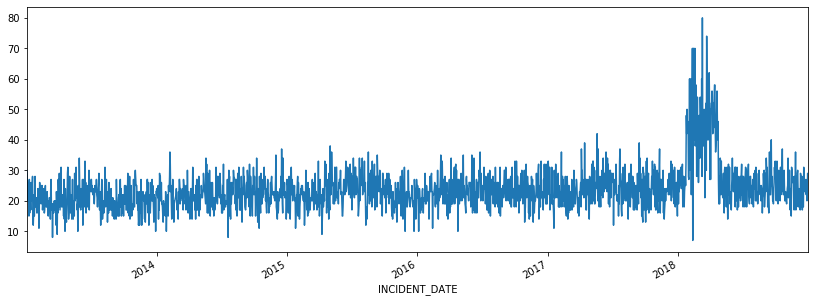

In [64]:
dfinal["CALLS_PER_DAY_NYC"].plot(figsize = (14,5));

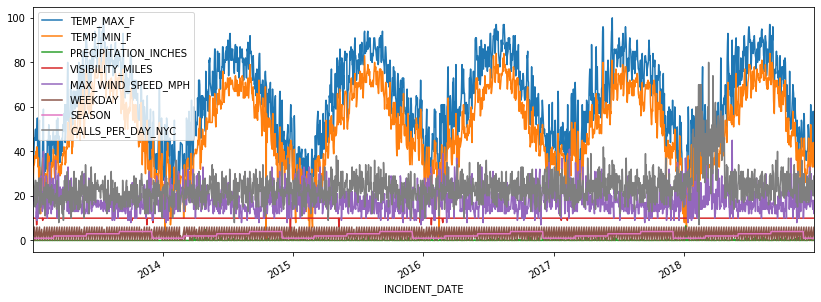

In [72]:
dfworking.plot(figsize = (14,5));

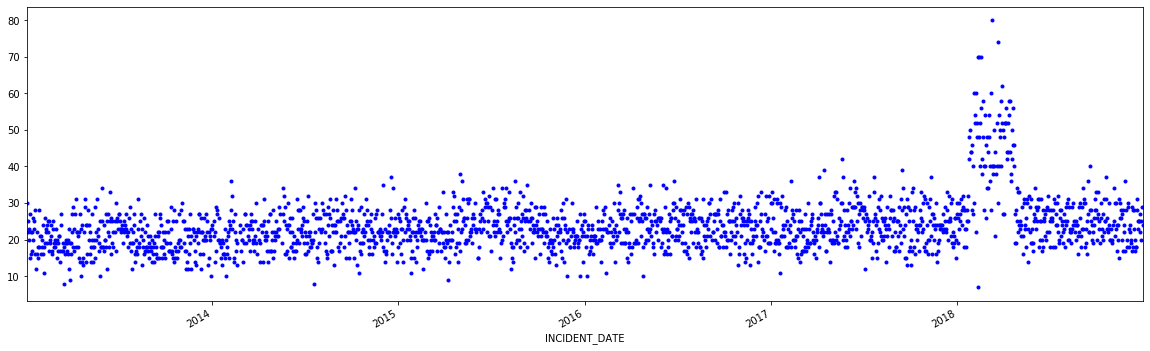

In [75]:
dfworking["CALLS_PER_DAY_NYC"].plot(figsize = (20,6), style = '.b');

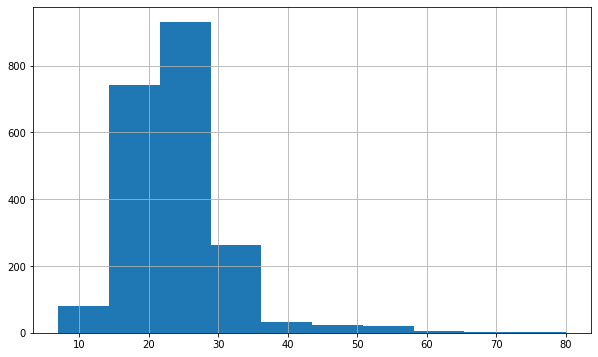

In [78]:
dfworking["CALLS_PER_DAY_NYC"].hist(figsize = (10,6));

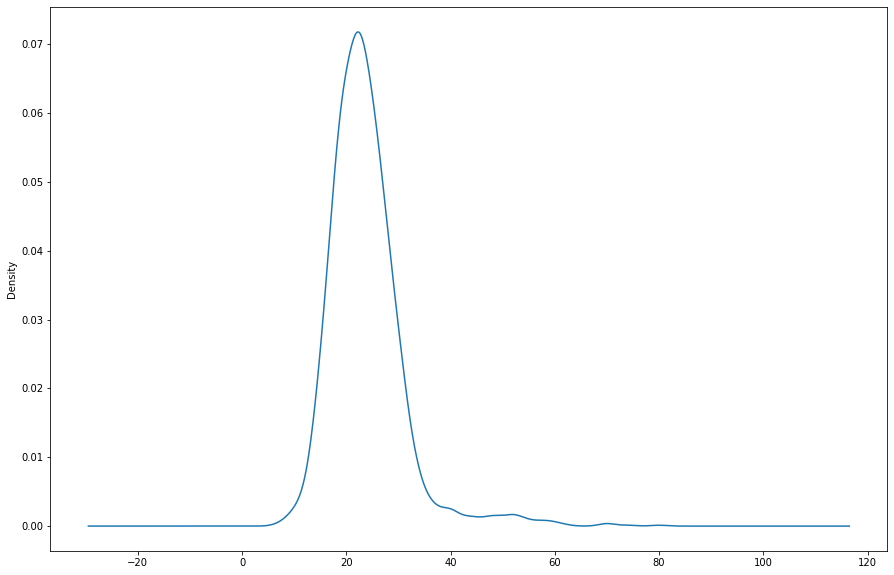

In [79]:
# Plot a density plot for nyse dataset
dfworking["CALLS_PER_DAY_NYC"].plot(kind='kde', figsize = (15,10));

In [70]:
dfworking.head()

,TEMP_MAX_F,TEMP_MIN_F,PRECIPITATION_INCHES,VISIBILITY_MILES,MAX_WIND_SPEED_MPH,WEEKDAY,SEASON,HOLIDAY,CALLS_PER_DAY_NYC
INCIDENT_DATE,,,,,,,,,
2013-01-02,34,24,0.0,10,18,2,1,False,30
2013-01-04,38,34,0.0,10,20,4,1,False,25
2013-01-05,43,34,0.0,10,18,5,1,False,22
2013-01-06,46,35,0.0,10,16,6,1,False,20
2013-01-07,45,38,0.0,10,16,0,1,False,23


In [67]:
dfinal.head()

,TEMP_MAX_F,TEMP_MIN_F,PRECIPITATION_INCHES,VISIBILITY_MILES,MAX_WIND_SPEED_MPH,WEEKDAY,SEASON,HOLIDAY,CALLS_PER_DAY_NYC
INCIDENT_DATE,,,,,,,,,
2013-01-02,34,24,0.0,10,18,2,1,False,30
2013-01-02,34,24,0.0,10,18,2,1,False,30
2013-01-02,34,24,0.0,10,18,2,1,False,30
2013-01-02,34,24,0.0,10,18,2,1,False,30
2013-01-02,34,24,0.0,10,18,2,1,False,30
